In [1]:
%run ./utils.ipynb

In [2]:
csv_path = "Agregados_por_setores_cor_ou_raca_BR_csv/Agregados_por_setores_cor_ou_raca_BR.csv"

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def calculate_seg(merged_gdf):
    s_dissim = SpatialDissim(merged_gdf, group_pop_var='pp_total', total_pop_var='pop_total')

    return s_dissim

In [5]:
estado = 'RS'
municipio = '4314902'
dummy_dinamico = False

shp_path = f"{estado}_setores_CD2022/{estado}_setores_CD2022.shp"
merged_df = process_mun(shp_path, csv_path, municipio)
all_segs_poa = calculate_seg(merged_df)

estado = 'RS'
municipio = '4314100'
dummy_dinamico = False

shp_path = f"{estado}_setores_CD2022/{estado}_setores_CD2022.shp"
merged_df = process_mun(shp_path, csv_path, municipio)
all_segs_bh = calculate_seg(merged_df)

In [6]:
n_iteracoes = 10
n_jobs = -1
backend = "threading"

poa_bh_test_label_1 = inference.TwoValueTest(all_segs_poa, all_segs_bh, null_approach='random_label', iterations_under_null=n_iteracoes, use_index = False, n_jobs = n_jobs, backend = backend)

  0%|          | 0/10 [00:00<?, ?it/s]

<Axes: title={'center': 'SpatialDissim (Diff. value = 0.123)'}, ylabel='Count'>

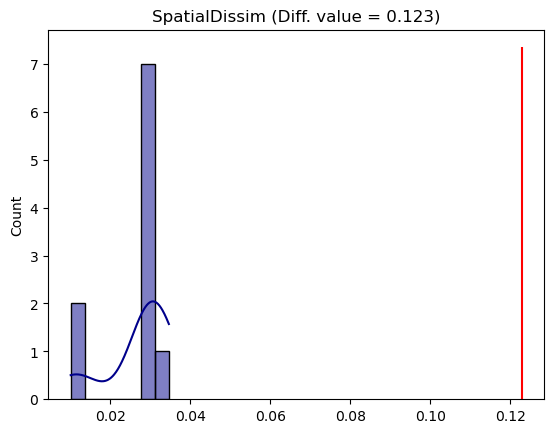

In [7]:
poa_bh_test_label_1.plot()